<a href="https://colab.research.google.com/github/sarasti2/network_in_economics/blob/main/create_and_analyze_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Initial configuration

import pandas as pd
import requests
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from io import StringIO


# Mini-Project: Networks in Economics  
**Summer School in Economics 2025**

**Authors**: Alejandro Sarasti, Juan Sebastián Osorno, María Paula Murcia  

This mini-project is part of the Summer Course on Networks in Economics. The objective is to create and analyze the friendship network among students participating in the course.


## Load matrix of the network of friends

In [6]:

# URL of the raw CSV file on GitHub
github_url = 'https://raw.githubusercontent.com/sarasti2/network_in_economics/main/graph_matrix_friends.csv'

try:
    # Download the CSV file from the GitHub URL
    response = requests.get(github_url)
    response.raise_for_status() # Raise an exception for bad status codes

    # Read the content into a pandas DataFrame
    friendship_matrix = pd.read_csv(StringIO(response.text), index_col=0)
    friendship_matrix = friendship_matrix.drop(columns=['Unnamed: 4', "Unnamed: 5", "Student's name"])

    # Display the first few rows of the matrix
    print("Friendship Matrix (first 5 rows):")
    display(friendship_matrix.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Friendship Matrix (first 5 rows):


,Student's gender,Student's type,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
Student's number,,,,,,,,,,,,,,,,,,,,,
1,Male,Master's student,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Female,Master's student,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Female,Master's student,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Male,Master's student,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Male,Master's student,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Visualize the graph


In [8]:
# Select only the columns that are student numbers (integers)
adj_matrix = friendship_matrix.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array
adj_array = adj_matrix.values

# Create a NetworkX graph object from the NumPy array
G = nx.from_numpy_array(adj_array)

# Print information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 36
Number of edges: 74


In [10]:
for index, row in friendship_matrix.iterrows():
    # Get the student number (index in the original dataframe)
    student_number = index

    # Get the corresponding node index in the NetworkX graph (0-indexed)
    # The node indices in the graph correspond to the row/column index in the adjacency matrix.
    # Since the original dataframe index starts from 1, and the numpy array conversion
    # results in 0-indexed nodes, we need to adjust the index.
    node_index = student_number - 1

    # Check if the node exists in the graph
    if node_index in G.nodes():
        # Extract attributes
        gender = row["Student's gender"]
        student_type = row["Student's type"]

        # Add attributes to the node
        G.nodes[node_index]['gender'] = gender
        G.nodes[node_index]['type'] = student_type
    else:
        print(f"Warning: Node with index {node_index} (corresponding to student {student_number}) not found in the graph.")

# Optional: Verify attributes for a few nodes
print("\nNode attributes for node 0 (Student 1):", G.nodes[0])
print("Node attributes for node 1 (Student 2):", G.nodes[1])
print("Node attributes for node 35 (Student 36):", G.nodes[35])


Node attributes for node 0 (Student 1): {'gender': 'Male', 'type': "Master's student"}
Node attributes for node 1 (Student 2): {'gender': 'Female', 'type': "Master's student"}
Node attributes for node 35 (Student 36): {'gender': 'Male', 'type': "Master's student"}


## Visualize the graph


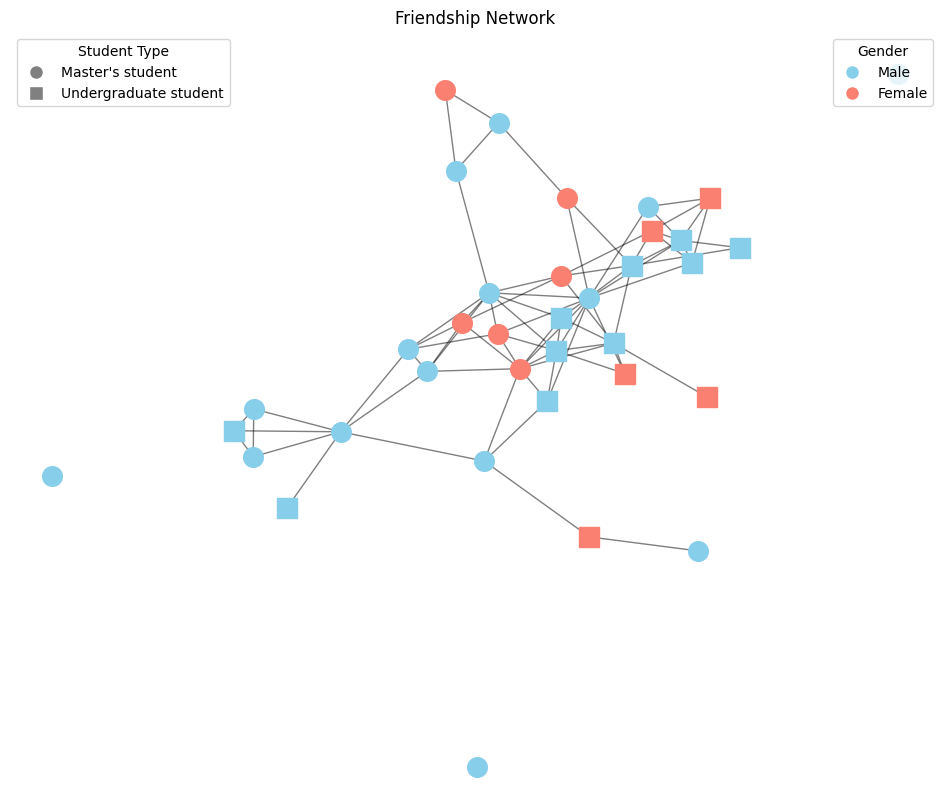

In [31]:
# Define node colors based on gender
gender_map = {'Male': 'skyblue', 'Female': 'salmon'}
node_colors = [gender_map[G.nodes[node]['gender']] for node in G.nodes()]

# Define node shapes based on student type
type_map = {"Master's student": 'o', 'Undergraduate student': 's'}
node_shapes = [type_map[G.nodes[node]['type']] for node in G.nodes()]

# Define the layout for the graph with increased spacing (adjust k)
pos = nx.spring_layout(G, k=0.3) # Increase k for more spacing

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw nodes with specified colors and shapes
for i, node in enumerate(G.nodes()):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_colors[i], node_shape=node_shapes[i], node_size=200, label=f"{G.nodes[node]['gender']}, {G.nodes[node]['type']}")

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels (optional, can be too cluttered for large graphs)
# nx.draw_networkx_labels(G, pos, font_size=10, verticalalignment='baseline')

# Create a legend for gender
gender_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Male',
                          markerfacecolor='skyblue', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Female',
                          markerfacecolor='salmon', markersize=10)]

# Create a legend for student type
type_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Master's student",
                          markerfacecolor='gray', markersize=10),
                        plt.Line2D([0], [0], marker='s', color='w', label='Undergraduate student',
                          markerfacecolor='gray', markersize=10)]

# Add legends to the plot, placing both on the upper side
legend1 = plt.legend(handles=gender_legend_elements, loc='upper right', title='Gender')
plt.gca().add_artist(legend1) # Add the first legend manually to keep it when adding the second

legend2 = plt.legend(handles=type_legend_elements, loc='upper left', title='Student Type')


plt.title("Friendship Network")
plt.axis('off') # Hide axes
plt.show()

## Network Properties Calculation

Now, let's calculate some key network properties to understand the structure of the friendship graph.

Degree Distribution:
Degree 10: 1 nodes
Degree 9: 2 nodes
Degree 8: 1 nodes
Degree 7: 4 nodes
Degree 5: 7 nodes
Degree 4: 4 nodes
Degree 3: 8 nodes
Degree 2: 3 nodes
Degree 1: 3 nodes
Degree 0: 3 nodes


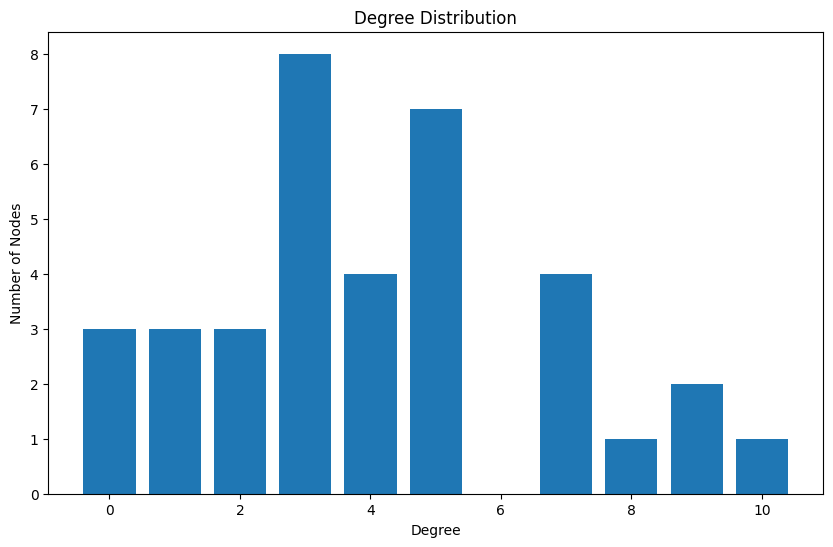

In [25]:
# Calculate Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_counts = {}
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

print("Degree Distribution:")
for degree, count in degree_counts.items():
    print(f"Degree {degree}: {count} nodes")

# Plot Degree Distribution (optional)
plt.figure(figsize=(10, 6))
plt.bar(list(degree_counts.keys()), list(degree_counts.values()))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

In [26]:
# Calculate Mean Degree
mean_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"\nMean Degree: {mean_degree:.2f}")

# Calculate Degree Variance
degrees = np.array([d for n, d in G.degree()])
degree_variance = np.var(degrees)
print(f"Degree Variance: {degree_variance:.2f}")

# Calculate Network Density
density = nx.density(G)
print(f"Network Density: {density:.4f}")


Mean Degree: 4.11
Degree Variance: 6.65
Network Density: 0.1175
